## 1. GAN (generative adversarial networks)
- gan - https://www.geeksforgeeks.org/generative-adversarial-network-gan/

- Unsupervised learning
<div>
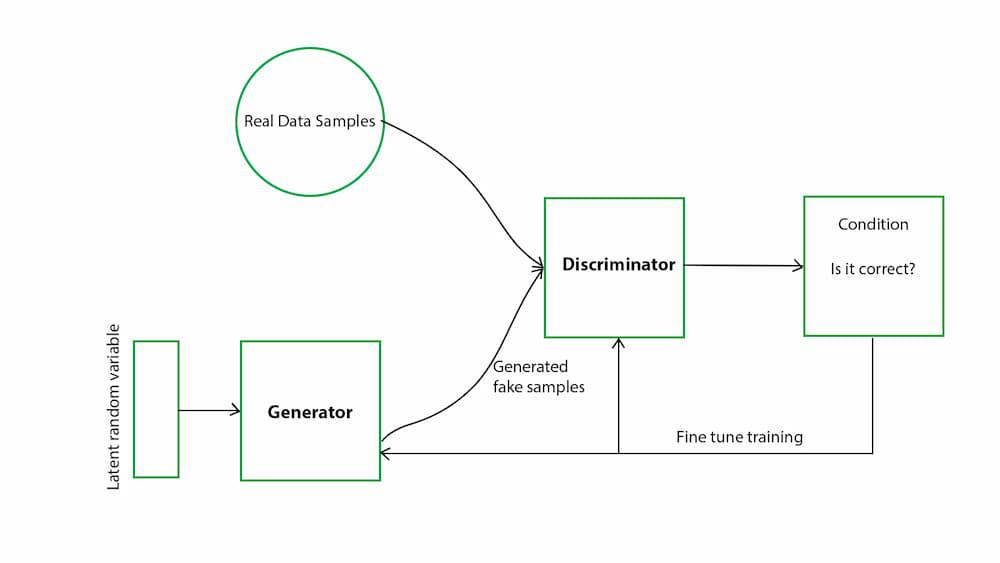
</div>

1. Architecture <br>
1-1) Generator : it takes random noise as input and tries to generate data samples similar to real data from the target dist.<br>
1-2) Discriminator : distinguish between real data from the target distribution and fake data made by generator.<br>
2. Training Process <br>
During training, the generator and discriminator are trained simultaneously in a minimax game framework.
The generator aims to produce data samples that are indistinguishable from real data, while the discriminator aims to correctly classify real and fake samples.
3. Objective<br>
The objective of the generator is to minimize the probability that the discriminator correctly classifies its generated samples as fake.<br>
The objective of the discriminator is to maximize the probability of correctly classifying real samples as real and fake samples as fake.<br>
4. Adversarial Training <br>
The training process involves alternating between updating the generator to fool the discriminator and updating the discriminator to better distinguish between real and fake samples.<br>
This adversarial training process leads to a competitive dynamic where the generator improves at generating realistic samples, while the discriminator becomes more discerning.
5. Loss Functions<br>
The generator's loss function is typically the negative log likelihood of the discriminator being correct (i.e., minimizing the probability of the discriminator classifying its generated samples as fake).<br>
The discriminator's loss function is typically a combination of the log likelihood of correct classification for real and fake samples (e.g., cross-entropy loss).
6. Convergence<br>
Ideally, GANs converge when the generator produces samples that are indistinguishable from real samples, and the discriminator is unable to differentiate between real and fake samples with high confidence.<br>
7. Applications<br>
GANs have been successfully applied in various domains, including image generation, image-to-image translation, text-to-image synthesis, style transfer, and more.

## 2. Transformer, Sentence transformer
- https://serokell.io/blog/transformers-in-ml
- https://www.columbia.edu/~jsl2239/transformers.html
- Encoder(Input into vectors) and Decoder(vectors into output)
1) Encoder:
It was introduced after we have seen the decoder cannot be passed from a hidden state beccause of the varying sizes of elements. (Also, rnn process input sequentially)
<br>
1-1) Multi-head self-attention : 
<br>
This is to get the dependencies of all the tokens. Self attention access to each token in the sequence to all other tokens.
<br>It splits the embeddings into mutiple heads, attention computations independently then concatenate the outputs (Hidden state).
<br>
<br>
1-2) Position-wise Feedforward Networds:
<br>
each token -> position-wise feedforward networks. Fully connected + ReLU.
<br>
1-3) Layer Norm and Residual Connections:
<br>
Norm improves the stability and convergence.
<br>
Residual connections enable the gradients by adding the original input to the output of each sub-layer.
** Attention : Q(input query),K(info from input compared to query; key),V(content associated with each key; value) vectors. The attention scores use some similarity measure(dot products, additive attention or socring function) to get the relationship between key and query vectors. Higher attention weight means higher relevancy to the query.

2) Decoder:
To get the output from encoded input representations. It attends encoder's output + previously generated tokens during decoding.
<br>
2-1) Masked Multi-Head Self-Attention Mechanism
<br>
Masking enables only access to the current input which is for short term understanding for the output.
<br>
2-2) Encoder-Decoder Attention
<br>
access to encoder output, helps decoder focuses on relevant parts of input sequence for the output; each token.
<br>
2-3) Position-wise Feedforward Networks and Output Projection
<br>
2-4) Layer Normalization and Residual Connections

Apendix
<br>
Attention(decoder) - Helps to understand the context with before/after words (Bark for dog or tree bark).
<br>
Self-attention(encoder) - By capturing a set of attention weights which indicates the relevance of each element to every other element. (Long range sequence)
<br>
Multi-head attention - tokens are broken up into multiple parts (head) and go to attention computing process. It is concatenated to output.
<br>
These processes are in parallel.

- Language models use a decoder-only architecture
- BERT-style models use an encoder-only architecture

<div>
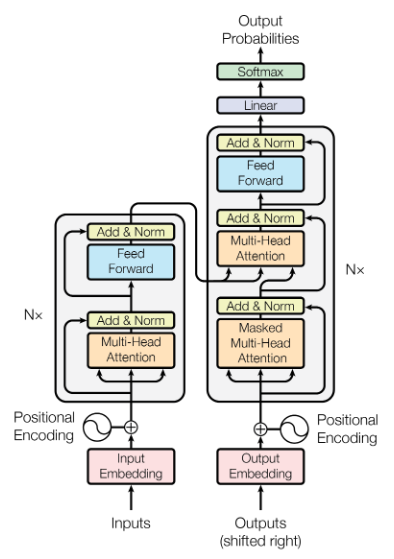
</div>



## 3. LSTM
-  https://www.theaidream.com/post/introduction-to-rnn-and-lstm

<div>
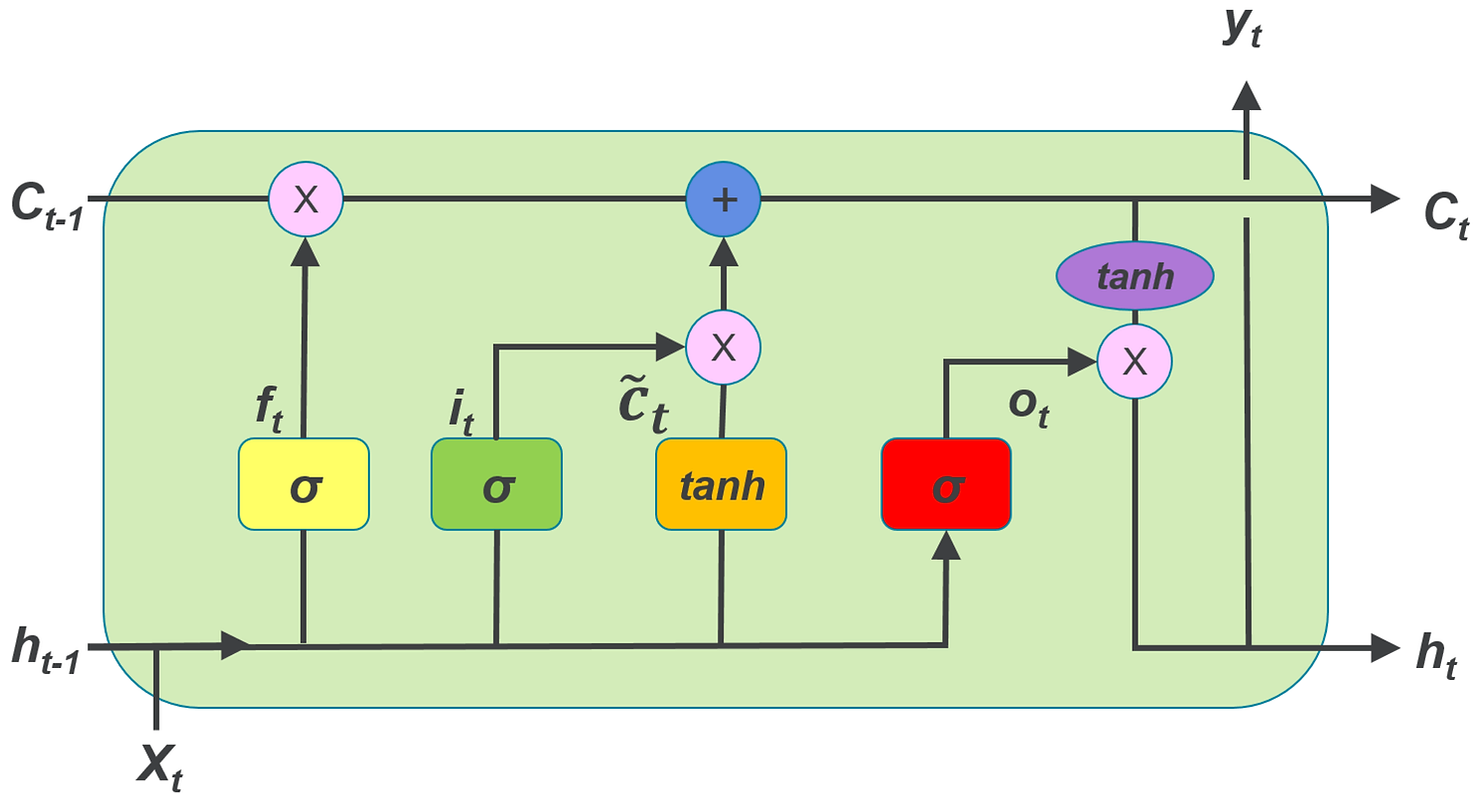
</div>


### Forward Propagation
- Hidden state activation -> by the other local activations near ->> Short term memory
- Activation state -> weights -> Long Term Memory
- Cell state : conveyor belt that runs the entire chain only with linear interactions *Unchanged.

<div>
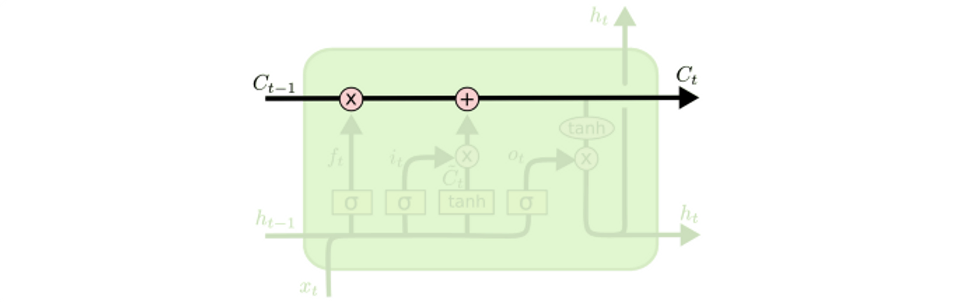
</div>


- Gates structure regulates and controlls (Sigmoid layer by multiplication operation 1 or 0) information to the cell state. X is "no" and + is "add" in the diagram

#### Cell state takes care of "Long term memory"

#### Forget gate : It is a gate to cell state (long term). It determines whether to keep or not in the long term memory.
#### Input gate : It is a gate to cell state (long term). It determines whether to add or not in the long term memory.
#### Output gate : With tanh, the output gate represents the hidden state which contains both LSTM. W/o tanh, it represents the short term memory unfiltered. It goes to both cell gate, hidden state, and the output of the model at the last hidden state.


## 4. RNN

### Forward propagation


<div>
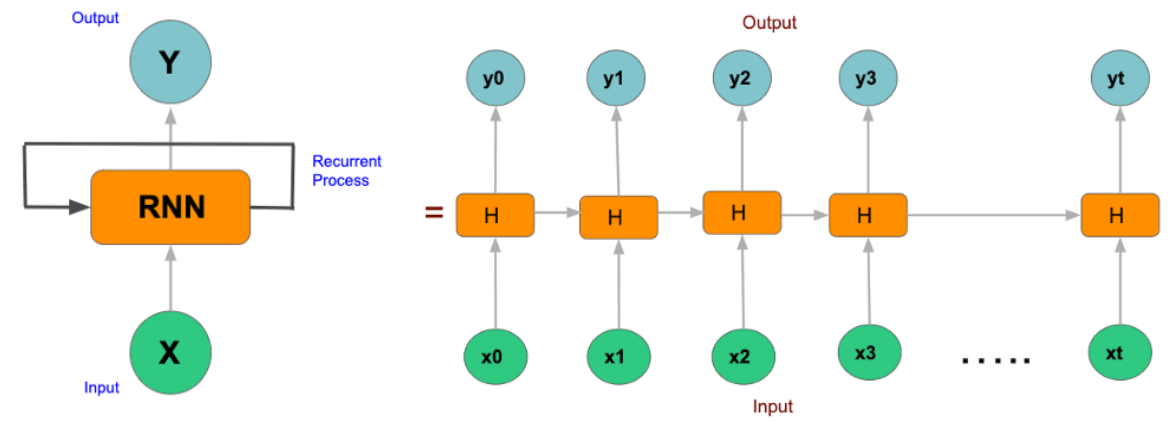
</div>



- The image showing that previous hidden state which was made from previous input is used for the next hidden state and it affects the output. The previous input and current input are dependent of each other.

- $ h_t = f(h_{t-1},x_t) $ where each input is called time step.
- RNN has a very simple structure where previous input data affects current hidden state through previous state.
- tanh is normally used for RNN because gradients can be biased towards positive or negative without hyper tangent. It helps faster learning by preventing those biases. $ h_t = tanh(W_{hh}h_{h-1} + W_{xh}x_t) $

### Backward propagation 
- It also gets affected by previous steps. 
- It seems the current state has very strong relationship with past states, but, since only direct connection is from the previous state, it lacks the long term dependencies. Which usually RNN leads vanishing/exploding gradient problems.

#### Vanishing problem
- Because of the chain rules applied to multiple times over and over through states, if one gradient approaches to 0, everything else will approaches 0 too. (Vanishing problem)

#### Exploding
- We can clip the gradient when it rushes to greater than 1 due to overflow.





## 5. biLSTM
https://www.geeksforgeeks.org/bidirectional-lstm-in-nlp/

- It is two LSTM layers; one processing the input in the forward direction and the other for backward direction.
- This characteristic helps to better understand preceding and following words in a sentence.


<div>
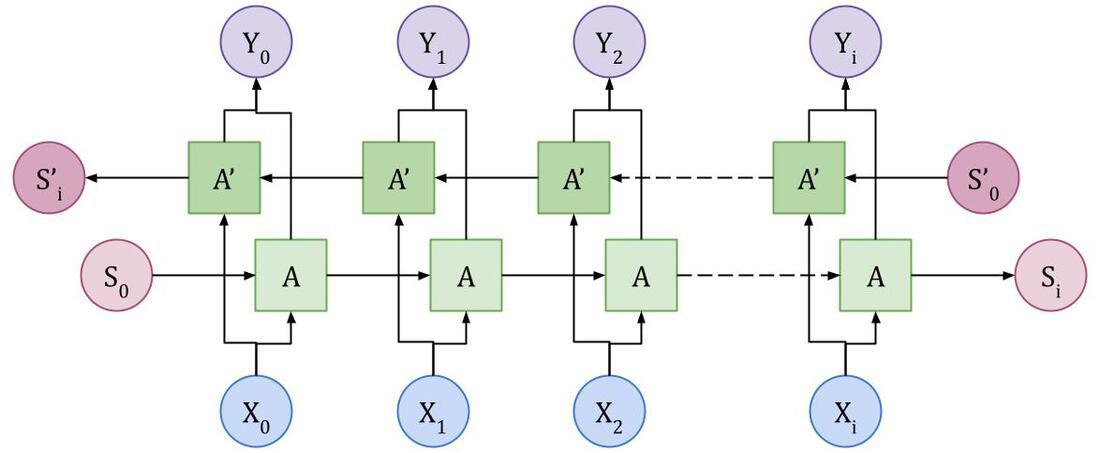
</div>

- Advantage of BiLSTM is it has reduced vanishing gradient and higher accuracy, but has higher computation requirements due to the both directions.

## 6. t5

It has encoder-decoder architecture to solve many of different language problems.

<div>
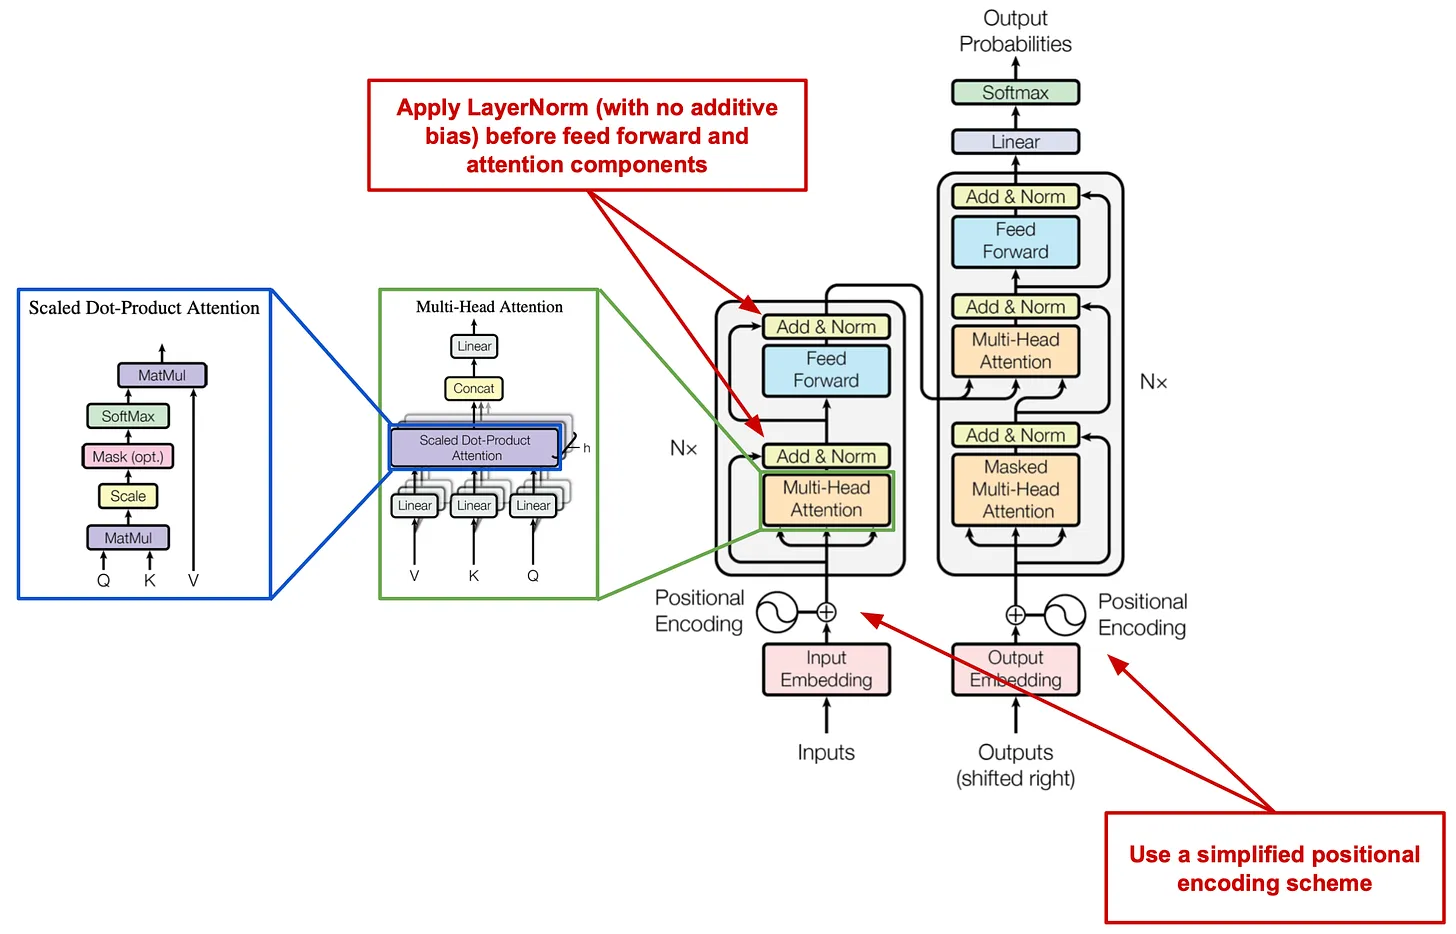
</div>


## 7. Tokenizer
https://huggingface.co/learn/nlp-course/en/chapter6/1?fw=pt

1) Byte-Pair Encoding (BPE):

Overview: BPE is a data compression algorithm that has been adapted for subword tokenization in NLP. It works by iteratively merging the most frequent pairs of consecutive bytes (characters or subwords) in a corpus, effectively building a vocabulary of subword units.
Tokenization Process:
Start with a vocabulary containing individual characters or pre-defined subwords.
Iteratively merge the most frequent pair of tokens in the corpus until reaching the desired vocabulary size or a predefined number of merge operations.
The resulting vocabulary consists of subword units that can represent both frequent and rare words in the corpus.
Example: Suppose we start with a vocabulary containing individual characters and apply BPE to the word "apple." After several merge operations, BPE might produce subword units like "ap," "pl," and "e" in its vocabulary.


2) WordPiece:

Overview: WordPiece is a subword tokenization technique similar to BPE but with a different merging strategy. It was popularized by Google's BERT (Bidirectional Encoder Representations from Transformers) model. WordPiece operates by greedily merging the most frequent subword or character sequences in the corpus.
Tokenization Process:
Start with a vocabulary containing individual characters or pre-defined subwords.
Greedily merge the most frequent subword or character sequences until reaching the desired vocabulary size or a predefined number of merge operations.
The resulting vocabulary consists of subword units that can represent words of varying frequencies in the corpus.
Example: Using the same word "apple," WordPiece might produce subword units like "app," "le," and "#" (word boundary symbol) in its vocabulary.


3) Unigram Tokenization:

Overview: Unigram Tokenization is a subword tokenization technique that focuses on preserving the statistical properties of the corpus, particularly the frequency distribution of subword units. It aims to minimize the loss of information during tokenization.
Tokenization Process:
Start with a vocabulary containing individual characters or pre-defined subwords.
Greedily select the most frequent subword units according to their occurrence in the corpus, while considering their individual tokenization costs (based on their frequencies).
The resulting vocabulary consists of subword units that optimize the trade-off between representing frequent words accurately and minimizing the overall tokenization cost.
Example: For "apple," Unigram Tokenization might select subword units like "ap," "pp," "l," and "e" based on their frequencies and tokenization costs.

In [1]:
import torch

/Users/tchun/opt/anaconda3/envs/carparts/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd

df = pd.read_csv('TalkFile_ner_2.csv.csv')
df['Tag'] = df['Tag'].apply(lambda x: eval(x))

In [3]:
df.head()

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","[O, O, O, O, O, O, O, O, O, O, O, B-geo, I-geo..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","[O, O, O, O, O, O, O, O, O, O, O, B-geo, O, O,..."


In [4]:
list_all_tag = df.Tag.to_list()

In [5]:
from itertools import chain
list_labels = ['O'] + [i for i in list(set(chain.from_iterable(list_all_tag))) if i !='O']
label2ind = {}
ind2label = {}
for ind,i in enumerate(list_labels):
    label2ind[i]=ind
    ind2label[ind]=i

In [6]:
label2ind

{'O': 0,
 'B-geo': 1,
 'B-org': 2,
 'I-tim': 3,
 'B-nat': 4,
 'I-geo': 5,
 'I-org': 6,
 'I-art': 7,
 'I-eve': 8,
 'B-per': 9,
 'B-gpe': 10,
 'B-art': 11,
 'B-eve': 12,
 'I-gpe': 13,
 'I-nat': 14,
 'I-per': 15,
 'B-tim': 16}

In [7]:
# df['Sentence'].to_list()
labels_ind_list = df['Tag'].apply(lambda x: 
                [label2ind[i] for i in x]
               ).to_list()

text_list = df['Sentence'].apply(lambda x:x.split(' ')).to_list()

data_dict = {'id':list(range(len(text_list))),'tokens':text_list,'ner_tags':labels_ind_list}


In [8]:
new_df = pd.DataFrame(data_dict)
new_df.head()

,id,tokens,ner_tags
0,0,"[Thousands, of, demonstrators, have, marched, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ..."
1,1,"[Families, of, soldiers, killed, in, the, conf...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,"[They, marched, from, the, Houses, of, Parliam...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0]"
3,3,"[Police, put, the, number, of, marchers, at, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,4,"[The, protest, comes, on, the, eve, of, the, a...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, ..."


In [9]:
from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer

model = AutoModelForTokenClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=17, id2label=ind2label, label2id=label2ind
)
model2 = AutoModelForTokenClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=17, id2label=ind2label, label2id=label2ind
)

Some weights of the model checkpoint at distilbert/distilbert-base-uncased were not used when initializing DistilBertForTokenClassification: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You s

In [10]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)

    labels = []
    for i, label in enumerate(examples[f"ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)  # Map tokens to their respective word.
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:  # Set the special tokens to -100.
            if word_idx is None:
                label_ids.append(-100)
            elif word_idx != previous_word_idx:  # Only label the first token of a given word.

                label_ids.append(label[word_idx])

            else:
                label_ids.append(-100)
            previous_word_idx = word_idx
        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")

In [11]:
from sklearn.model_selection import train_test_split
train_df,test_df = train_test_split(new_df,test_size=0.2,random_state=42)

In [12]:
import datasets
dataset_dict = datasets.DatasetDict()
dataset_dict['train'] = datasets.Dataset.from_pandas(train_df)
dataset_dict['test'] = datasets.Dataset.from_pandas(test_df)



tokenized_dataset = dataset_dict.map(tokenize_and_align_labels, batched=True)

Map:   0%|                         | 0/38367 [00:00<?, ? examples/s]Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [13]:
example = tokenized_dataset['train'][0]


In [14]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)
import evaluate

seqeval = evaluate.load("seqeval")
import numpy as np

labels = [ind2label[i] for i in example[f"ner_tags"]]


def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    true_predictions = [
        [ind2label[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [ind2label[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = seqeval.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }

In [ ]:
training_args = TrainingArguments(
    output_dir=".",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForTokenClassification.forward` and have been ignored: id, ner_tags, __index_level_0__, tokens. If id, ner_tags, __index_level_0__, tokens are not expected by `DistilBertForTokenClassification.forward`,  you can safely ignore this message.
/Users/tchun/opt/anaconda3/envs/carparts/lib/python3.9/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 38367
  Num Epochs = 2
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 4796


Epoch,Training Loss,Validation Loss


In [ ]:
from transformers import pipeline
text = ' '.join(tokenized_dataset["test"]['tokens'][0])

classifier = pipeline("ner", model=model,tokenizer=tokenizer)
classifier(text)

In [ ]:

for name, param in model2.named_parameters():
#     print(name)
    if name.startswith("distilbert.embeddings"):
        param.requires_grad = False
        print(name)


In [ ]:
training_args2 = TrainingArguments(
    output_dir=".",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer2 = Trainer(
    model=model2,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer2.train()

In [ ]:
from transformers import pipeline
text = ' '.join(tokenized_dataset["test"]['tokens'][0])

classifier = pipeline("ner", model=model2,tokenizer=tokenizer)
classifier(text)